# Viewer
For looking at the results of `space-between-expt.ipynb` .

If you didn't run this notebook you can grab a copy by running `$ make pulls3-results` to grab a copy from S3 - this will put results into `energypy

## Load up all results

In [1]:
!pip install matplotlib pandas -Uq
import pandas as pd

results = pd.read_parquet('./results/monthly-results.parquet')
results.head(3)

You should consider upgrading via the '/Users/adam/.pyenv/versions/3.7.9/envs/epl/bin/python3.7 -m pip install --upgrade pip' command.


,Actual Cost [$/5T],Forecast Cost [$/5T],Carbon Cost [tC/5T],objective,year,month,day,date
0,-64245.448667,-64245.448667,-0.889414,price,2014,1,1,2014-01-01
0,22275.016667,22275.016667,-633.143713,carbon,2014,1,1,2014-01-01
0,-7930.490333,-7930.490333,10.153607,price,2014,2,1,2014-02-01


## Entire time period summary

In [2]:
summary = results.groupby('objective').agg({
    'Actual Cost [$/5T]': 'sum',
    'Carbon Cost [tC/5T]': 'sum',
})
summary.loc['delta', :] = summary.loc['price', :] - summary.loc['carbon', :]
summary['carbon-price'] = summary.iloc[:, 0] / summary.iloc[:, 1]
summary.head()

,Actual Cost [$/5T],Carbon Cost [tC/5T],carbon-price
objective,,,
carbon,6.665649e+05,-66103.835248,-10.083604
price,-3.245173e+06,391.131616,-8296.882546
delta,-3.911738e+06,66494.966864,-58.827580


## Monthly Summaries

In [3]:
pvt = results.pivot_table(index='date', values=['Actual Cost [$/5T]', 'Carbon Cost [tC/5T]'], columns='objective')
pvt.columns = [' '.join(col).strip() for col in pvt.columns.values]
pvt.head(3)

,Actual Cost [$/5T] carbon,Actual Cost [$/5T] price,Carbon Cost [tC/5T] carbon,Carbon Cost [tC/5T] price
date,,,,
2014-01-01,22275.016667,-64245.448667,-633.143713,-0.889414
2014-02-01,7405.386833,-7930.490333,-550.246251,10.153607
2014-03-01,5919.933500,-2816.820000,-588.708911,6.353111


In [4]:
pvt['price-delta'] = pvt.loc[:, 'Actual Cost [$/5T] carbon'] - pvt.loc[:, 'Actual Cost [$/5T] price']
pvt['carbon-delta'] = pvt.loc[:, 'Carbon Cost [tC/5T] price'] - pvt.loc[:, 'Carbon Cost [tC/5T] carbon']
pvt['carbon-price'] = pvt['price-delta'] / pvt['carbon-delta']
pvt

,Actual Cost [$/5T] carbon,Actual Cost [$/5T] price,Carbon Cost [tC/5T] carbon,Carbon Cost [tC/5T] price,price-delta,carbon-delta,carbon-price
date,,,,,,,
2014-01-01,22275.016667,-64245.448667,-633.143713,-0.889414,86520.465333,632.254298,136.844408
2014-02-01,7405.386833,-7930.490333,-550.246251,10.153607,15335.877167,560.399858,27.365955
2014-03-01,5919.933500,-2816.820000,-588.708911,6.353111,8736.753500,595.062022,14.682089
2014-04-01,5073.782833,-2873.629833,-655.050237,-9.307700,7947.412667,645.742537,12.307401
2014-05-01,5082.608167,-4122.582167,-602.037119,-10.040831,9205.190333,591.996288,15.549406
2014-06-01,5374.808167,-11551.002500,-670.512840,-23.665666,16925.810667,646.847174,26.166630
2014-07-01,-5630.783333,-34071.833000,-838.662471,-22.786876,28441.049667,815.875595,34.859542
2014-08-01,1734.389333,-16477.697667,-718.527706,-21.666440,18212.087000,696.861266,26.134452
2014-09-01,6434.059000,-13142.062667,-692.797193,-20.609911,19576.121667,672.187283,29.123017


<AxesSubplot:xlabel='date'>

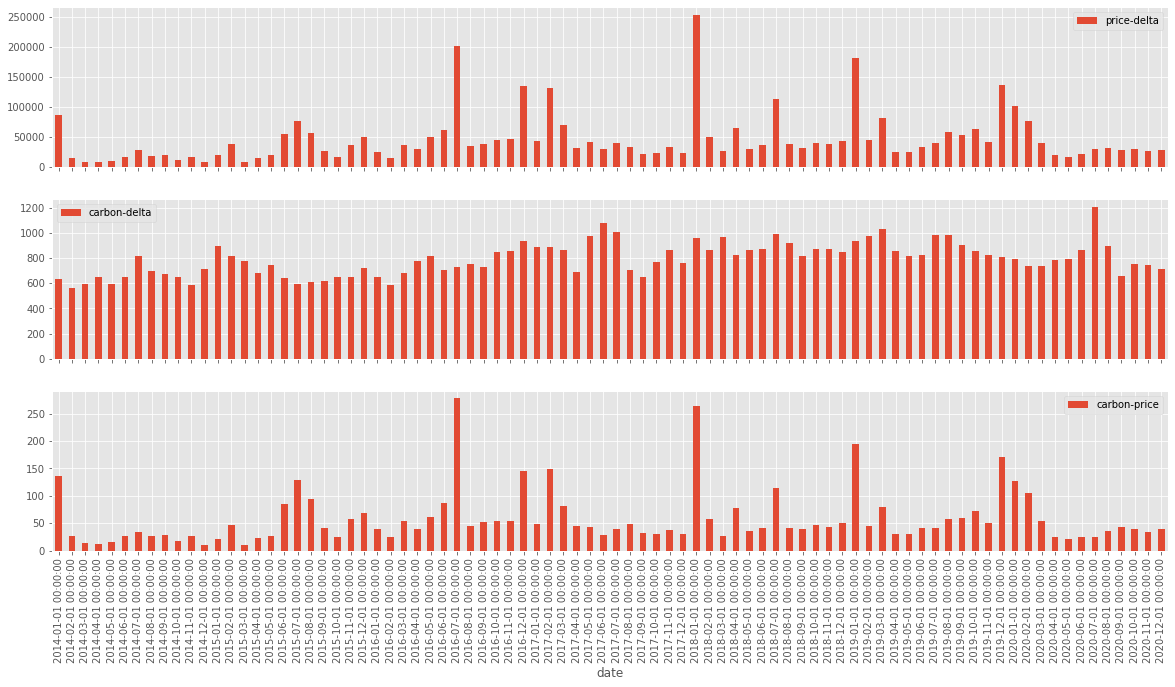

In [9]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

f, axes = plt.subplots(nrows=3, figsize=(20, 10), sharex=True)
pvt.plot(ax=axes[0], y='price-delta', kind='bar')
pvt.plot(ax=axes[1], y='carbon-delta', kind='bar')
pvt.plot(ax=axes[2], y='carbon-price', kind='bar')

<AxesSubplot:xlabel='date'>

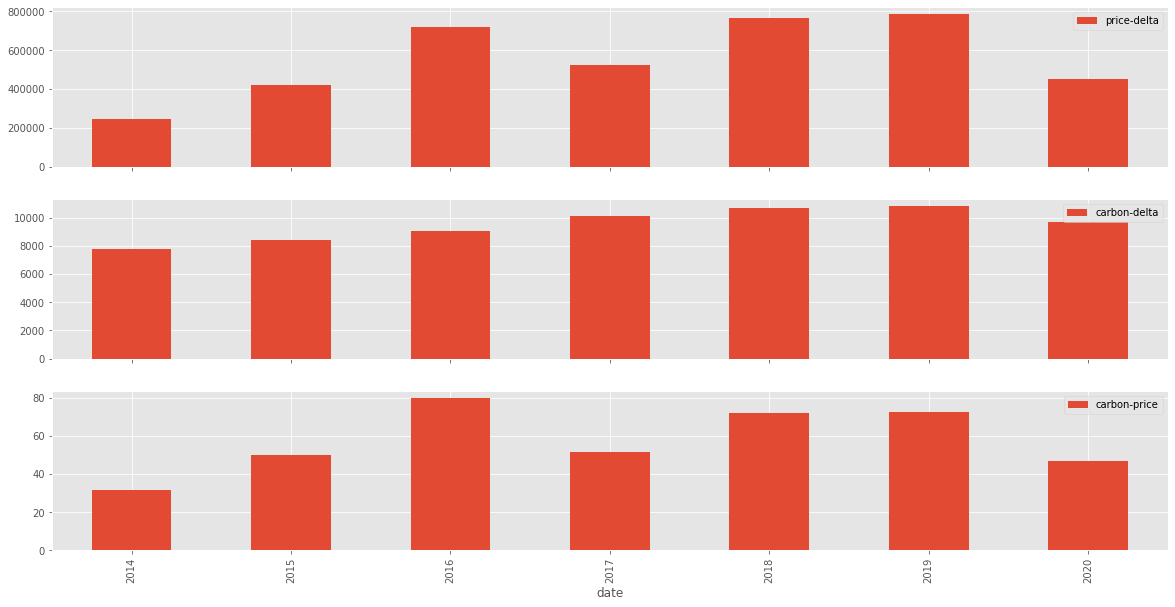

In [10]:
#  annual groupby
pvt.index = pd.to_datetime(pvt.index)

annual = pvt.groupby(pvt.index.year).agg({
    'price-delta': 'sum',
    'carbon-delta': 'sum'
})
annual['carbon-price'] = annual['price-delta'] / annual['carbon-delta']

f, axes = plt.subplots(nrows=3, figsize=(20, 10), sharex=True)
annual.plot(ax=axes[0], y='price-delta', kind='bar')
annual.plot(ax=axes[1], y='carbon-delta', kind='bar')
annual.plot(ax=axes[2], y='carbon-price', kind='bar')

<AxesSubplot:xlabel='price-delta', ylabel='carbon-delta'>

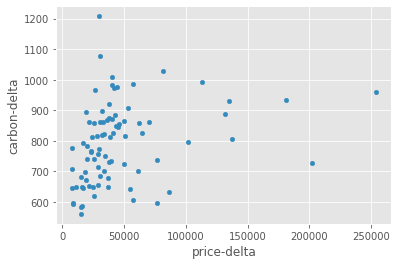

In [11]:
#  scatter carbon delta versus price delta
pvt.plot(x='price-delta', y='carbon-delta', kind='scatter')